Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_spmv.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

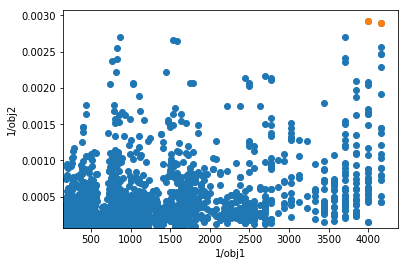

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


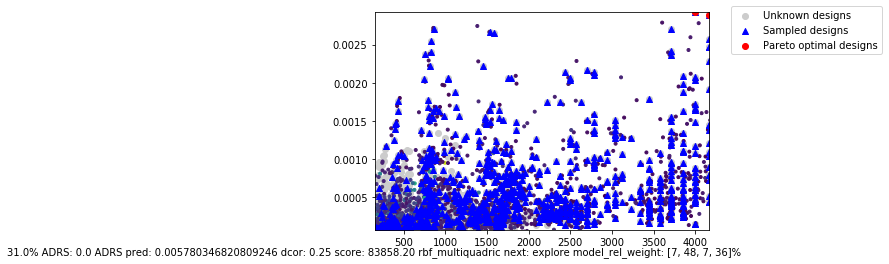

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 912, 2596, 1703,  918,  921,  672,  612,    5,    6, 2451,    0,
         40,  120,    1,    2,    3,  593,  121,  122,  123,  124,  130,
        125,  131,    4,    7,  598, 2114, 1293,  132,   10,  594,  133,
       2110,  134, 2135,    9,  135,  600,  126,  127,    8,   41, 1294,
        140,  597,  602, 2103,  282,  284, 2102,   11,  128,  136,  608,
        129,  280,  137,   12,  596,  595,  283,  601,   42,  599, 2094,
        281,  609,  610, 1281, 2743,   45,   46,  290, 1352,  138,   47,
        139,  611, 1960, 2167,   43,   20, 2700,  613,   15,   16,  160,
        141, 1852,  142, 2090, 2140,  143,  145, 1277,  146,   17,  625,
       1377, 1533, 2742,   13, 2139,  614,  607,  604,  144,  293,  291,
        147,  591,   55, 2113,  292,  285,  615, 1888,  603,  151, 2095,
       1290,  153, 2169, 1292, 1272, 1341, 2182, 1298, 1318, 1948, 2187,
       1113, 1906, 1357, 2086, 2398,  892, 2100, 2544, 2105,  149,  590,
       2385,  311, 1278, 1552, 2189, 2108,  652,  4